In [4]:
import numpy as np 
import pandas as pd
import os
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape,concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(2)
np.random.seed(1)

In [5]:
InputPath="C:/Users/heman/domain project/lol_dataset/our485/high/images/"

In [6]:
def addNoise(image):
    #salt and pepper noise
    noiseAddedImage = np.copy(image)
    height, width, _ = image.shape  
    num_pixels_to_change = int(np.ceil(image.size * 0.01))
    for _ in range(num_pixels_to_change):
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        noiseAddedImage[y, x] = 1

    return noiseAddedImage

255

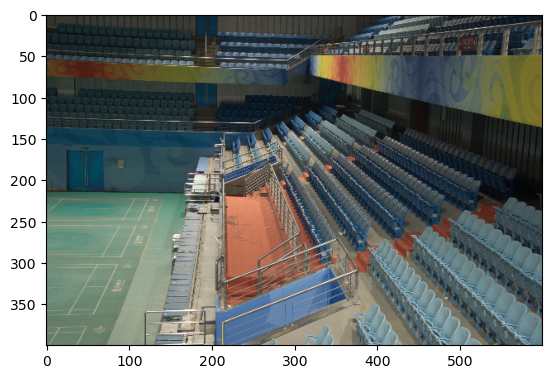

In [7]:
img = cv.imread(InputPath+"777.png")  
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
l = img.max()
plt.imshow(img)
l

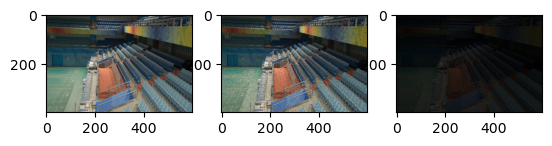

In [8]:
img = cv.imread(InputPath+"/777.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
l = img.max()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
Noise = addNoise(img)
plt.imshow(Noise)
plt.subplot(1,3,3)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) #convert it to hsv
hsv[...,2] = hsv[...,2]*0.2
img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
Noise2 = addNoise(img1)
plt.imshow(Noise2)

In [9]:
from tqdm import tqdm
HighPath = "C:/Users/heman/domain project/lol_dataset/our485/high/images/"

def PreProcessData(ImagePath):
    X_=[]
    y_=[]
    count=0
    for imageName in tqdm(os.listdir(HighPath)):
        count=count+1
        low_img = cv.imread(HighPath + "/" + imageName)
        low_img = cv.cvtColor(low_img, cv.COLOR_BGR2RGB)
        low_img = cv.resize(low_img,(500,500))
        hsv = cv.cvtColor(low_img, cv.COLOR_BGR2HSV) #convert it to hsv
        hsv[...,2] = hsv[...,2]*0.2
        img_1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        Noisey_img = addNoise(img_1)
        X_.append(Noisey_img)
        y_.append(low_img)
    X_ = np.array(X_)
    y_ = np.array(y_)

    return X_,y_

In [10]:
X_,y_ = PreProcessData(InputPath)

100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [00:27<00:00, 17.41it/s]


In [11]:
def InstantiateModel(in_):
    model_1 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(in_)
    model_1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(model_1)
    model_1 = Conv2D(64, (2, 2), activation='relu', padding='same', strides=1)(model_1)

    model_2 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(in_)
    model_2 = Conv2D(64, (2, 2), activation='relu', padding='same', strides=1)(model_2)

    model_2_0 = Conv2D(64, (2, 2), activation='relu', padding='same', strides=1)(model_2)

    model_add = add([model_1, model_2, model_2_0])

    model_3 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(model_add)
    model_3 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(model_3)
    model_3 = Conv2D(16, (2, 2), activation='relu', padding='same', strides=1)(model_3)

    model_3_1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(model_add)
    model_3_1 = Conv2D(16, (2, 2), activation='relu', padding='same', strides=1)(model_3_1)

    model_3_2 = Conv2D(16, (2, 2), activation='relu', padding='same', strides=1)(model_add)

    model_add_2 = add([model_3_1, model_3_2, model_3])

    model_4 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(model_add_2)
    model_4 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(model_4)
    model_4 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(model_4)

    model_add_3 = add([model_4, model_add_2, model_4])

    model_5 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(model_add_3)
    model_5 = Conv2D(16, (2, 2), activation='relu', padding='same', strides=1)(model_5)
    model_5 = Conv2D(3, (3, 3), activation='relu', padding='same', strides=1)(model_5)

    return model_5

In [12]:
Input_Sample = Input(shape=(500, 500,3))
Output_ = InstantiateModel(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error')

Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 500, 500, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 500, 500, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 500, 500, 32)         4640      ['conv2d[0][0]']              
                                                                                              

In [13]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


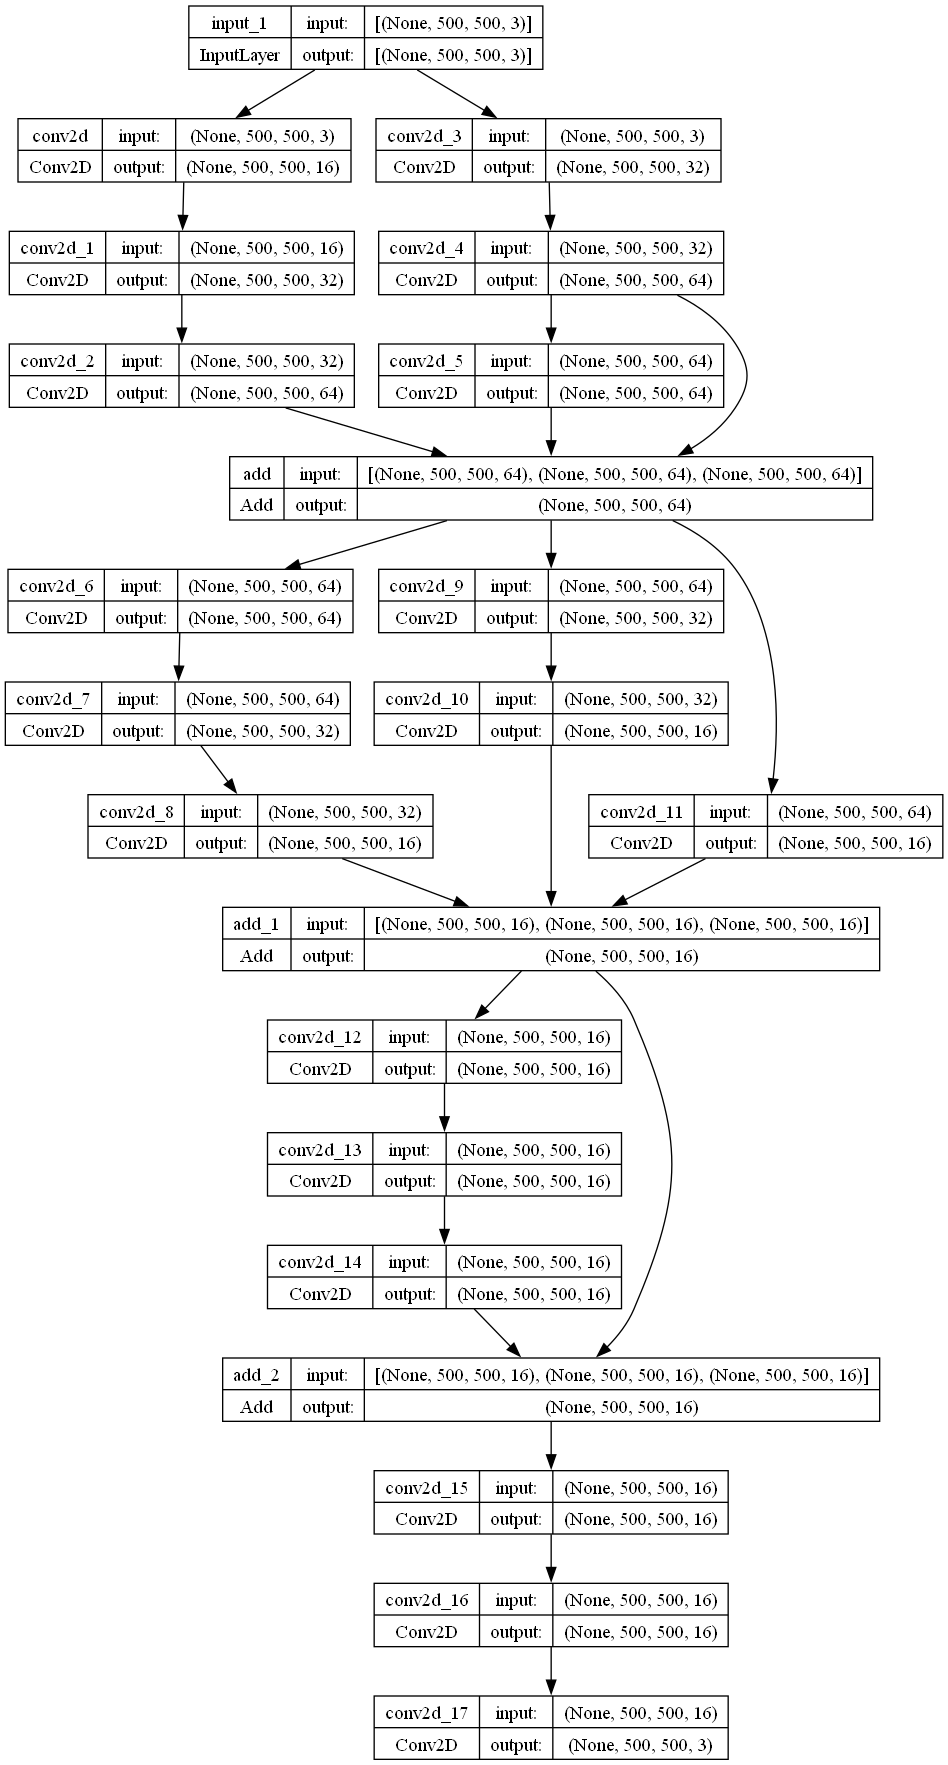

In [15]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(Model_Enhancer, to_file='model_.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_.png')


In [16]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,500,500,3)
        y_input = y[i].reshape(1,500,500,3)
        yield (X_input,y_input)
Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=40,verbose=1,steps_per_epoch=16,shuffle=True) #epochs * steps_per_epoch <= training dataset images...

Epoch 1/40


C:\Users\heman\AppData\Local\Temp\ipykernel_504\2278495012.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=40,verbose=1,steps_per_epoch=16,shuffle=True) #epochs * steps_per_epoch <= training dataset images...


16/16 [==============================] - 38s 2s/step - loss: 4823.1699
Epoch 2/40
16/16 [==============================] - 33s 2s/step - loss: 1185.2351
Epoch 3/40
16/16 [==============================] - 35s 2s/step - loss: 535.2108
Epoch 4/40
16/16 [==============================] - 35s 2s/step - loss: 377.2534
Epoch 5/40
16/16 [==============================] - 33s 2s/step - loss: 257.3019
Epoch 6/40
16/16 [==============================] - 31s 2s/step - loss: 292.5950
Epoch 7/40
16/16 [==============================] - 31s 2s/step - loss: 498.4556
Epoch 8/40
16/16 [==============================] - 31s 2s/step - loss: 334.2257
Epoch 9/40
16/16 [==============================] - 30s 2s/step - loss: 338.9076
Epoch 10/40
16/16 [==============================] - 31s 2s/step - loss: 381.7867
Epoch 11/40
16/16 [==============================] - 31s 2s/step - loss: 380.3829
Epoch 12/40
16/16 [==============================] - 32s 2s/step - loss: 327.0417
Epoch 13/40
16/16 [===============

In [17]:
TestPath="C:\\Users\\heman\\domain project\\lol_dataset\\our485\\high\\images\\"

In [18]:
def ExtractTestInput(ImagePath):
    img = cv.imread(ImagePath)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_ = cv.resize(img,(500,500))
    hsv = cv.cvtColor(img_, cv.COLOR_BGR2HSV) #convert it to hsv
    hsv[...,2] = hsv[...,2]*0.2
    img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    Noise = addNoise(img1)
    Noise = Noise.reshape(1,500,500,3)
    return Noise

1/1 [==============================] - 1s 538ms/step


C:\Users\heman\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


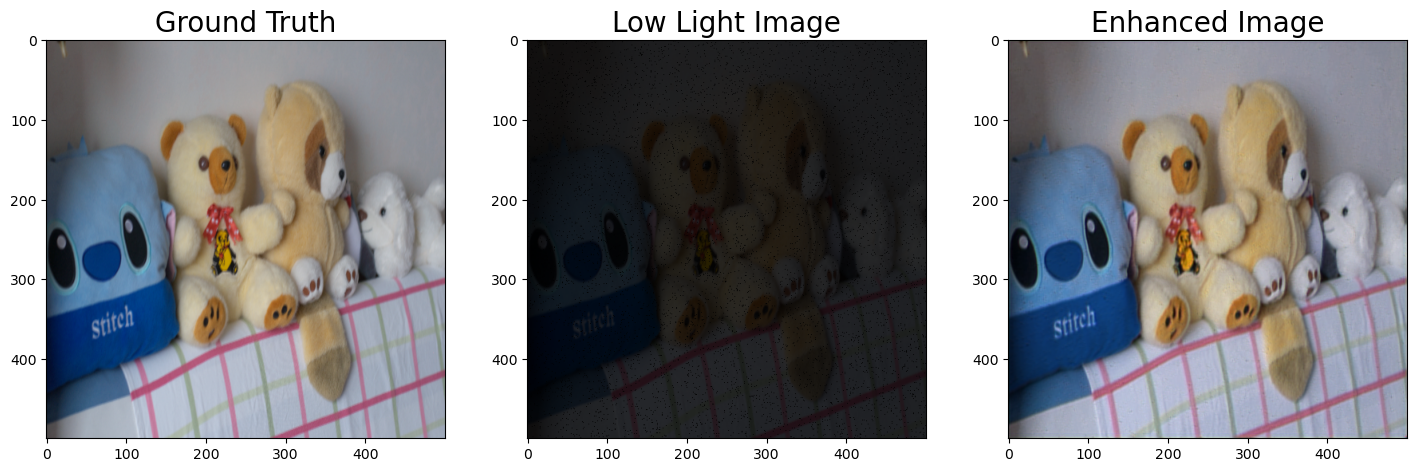

In [19]:
ImagePath=TestPath+"9.png"
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
img_1 = cv.imread(ImagePath)
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1 = cv.resize(img_1, (500, 500))
plt.title("Ground Truth",fontsize=20)
plt.imshow(img_1)

plt.subplot(5,5,1+1)
img_ = ExtractTestInput(ImagePath)
img_ = img_.reshape(500,500,3)
low=img_
plt.title("Low Light Image",fontsize=20)
plt.imshow(low)

plt.subplot(5,5,1+2)
image_for_test = ExtractTestInput(ImagePath)
Prediction = Model_Enhancer.predict(image_for_test)
Prediction = Prediction.reshape(500,500,3)
img_[:,:,:] = Prediction[:,:,:]
plt.title("Enhanced Image",fontsize=20)
plt.imshow(img_)
Model_Enhancer.save("Cnn_low1.h5")